In [187]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from xgboost import XGBClassifier

In [98]:
df=pd.read_csv("c:/Users/Tejas/Downloads/train_x.csv")
train_y=pd.read_csv("c:/Users/Tejas/Downloads/train_y.csv")
df["Label"]=train_y["Label"]

In [99]:
df.head()

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5,Label
0,1,1830.943788,14767.28013,B,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291,0.0
1,2,1645.302546,15272.26775,B,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455,0.0
2,3,1555.026392,17482.49734,A,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886,0.0
3,4,NaN,16257.66493,A,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849,0.0
4,5,1777.648916,16316.29914,B,X,1.0,NaN,224.074728,11.218489,605.947340,3438.864083,0.0


In [100]:
df.describe()

,ID,Expense,Income,Age,Score1,Score2,Score3,Score4,Score5,Label
count,80000.000000,77956.000000,78045.000000,77986.000000,78060.000000,77964.000000,78045.000000,78028.000000,78002.000000,76097.000000
mean,40000.500000,1733.993769,15641.112448,0.441105,0.187617,192.065584,9.365450,600.397742,3417.740403,0.066139
std,23094.155105,133.239147,1065.620737,0.496522,0.123509,28.558250,8.760134,3.826112,64.391844,0.248527
min,1.000000,1126.809192,11171.703240,0.000000,-0.563328,40.572797,-28.885235,581.806404,3124.413430,0.000000
25%,20000.750000,1644.263974,14925.658150,0.000000,0.112651,173.415940,3.514901,597.894759,3374.406833,0.000000
50%,40000.500000,1736.276720,15624.259290,0.000000,0.189877,191.056193,8.883862,600.095436,3418.793524,0.000000
75%,60000.250000,1824.376793,16346.084990,1.000000,0.265243,209.727593,14.746607,602.597131,3461.384283,0.000000
max,80000.000000,2309.129903,20728.915330,1.000000,0.705737,338.073551,50.691479,619.623108,3692.731924,1.000000


In [5]:
pandas_profiling.ProfileReport(df)

Number of variables,12
Number of observations,80000
Total Missing (%),2.3%
Total size in memory,7.3 MiB
Average record size in memory,96.0 B
Numeric,9
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [101]:
df.dropna(inplace=True)

In [102]:
df.shape

(59238, 12)

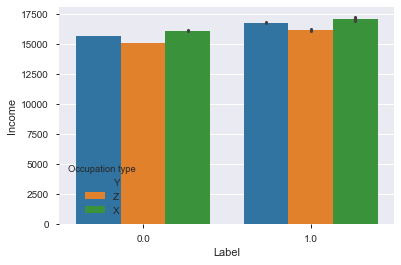

In [103]:
sns.barplot(x="Label",y="Income",hue="Occupation type",data=df);

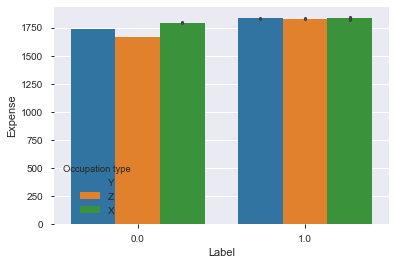

In [104]:
sns.barplot(x="Label",y="Expense",hue="Occupation type",data=df);

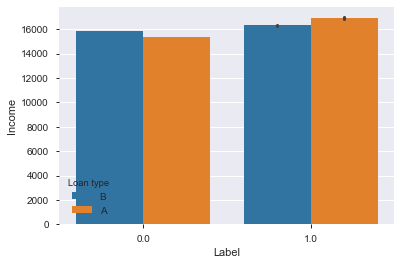

In [105]:
sns.barplot(x="Label",y="Income",hue="Loan type",data=df);

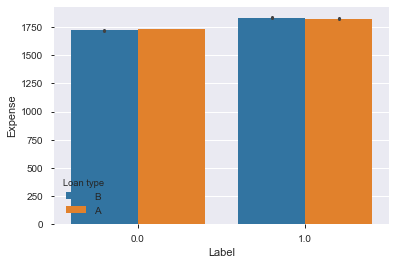

In [106]:
sns.barplot(x="Label",y="Expense",hue="Loan type",data=df);

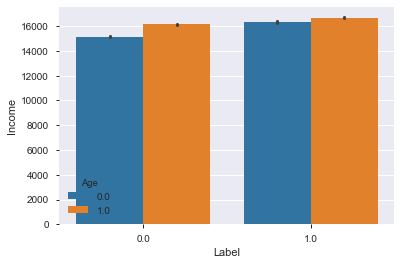

In [107]:
sns.barplot(x="Label",y="Income",hue="Age",data=df);

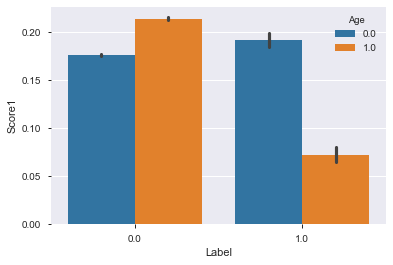

In [108]:
sns.barplot(x="Label",y="Score1",hue="Age",data=df);

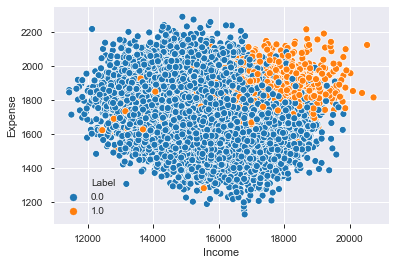

In [109]:
sns.scatterplot(x="Income",y="Expense",hue="Label",data=df);

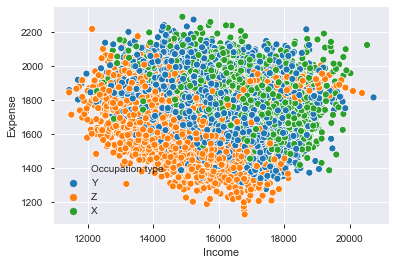

In [110]:
sns.scatterplot(x="Income",y="Expense",hue="Occupation type",data=df);

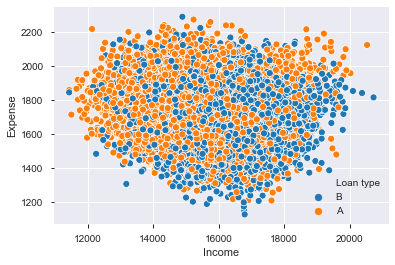

In [111]:
sns.scatterplot(x="Income",y="Expense",hue="Loan type",data=df);

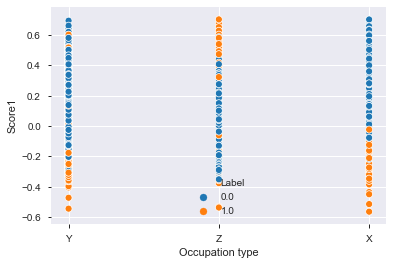

In [112]:
sns.scatterplot(x="Occupation type",y="Score1",hue="Label",data=df);

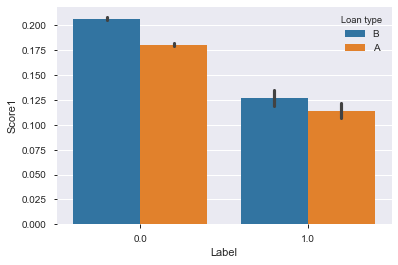

In [113]:
sns.barplot(x="Label",y="Score1",hue="Loan type",data=df);

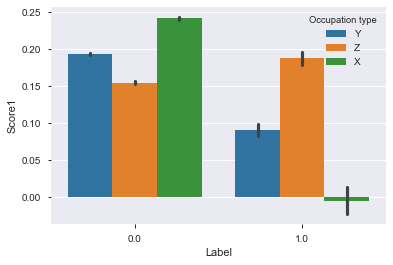

In [114]:
sns.barplot(x="Label",y="Score1",hue="Occupation type",data=df);

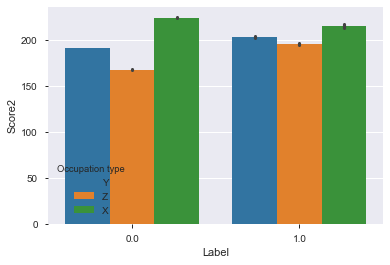

In [115]:
sns.barplot(x="Label",y="Score2",hue="Occupation type",data=df);

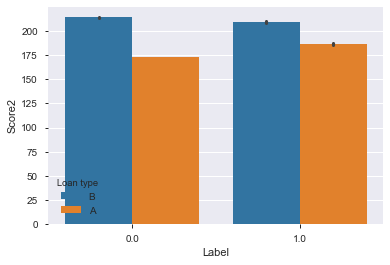

In [116]:
sns.barplot(x="Label",y="Score2",hue="Loan type",data=df);

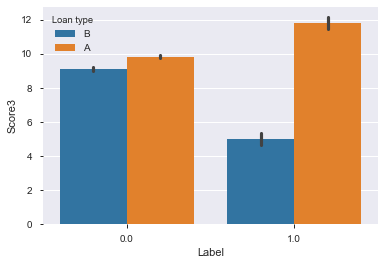

In [117]:
sns.barplot(x="Label",y="Score3",hue="Loan type",data=df);

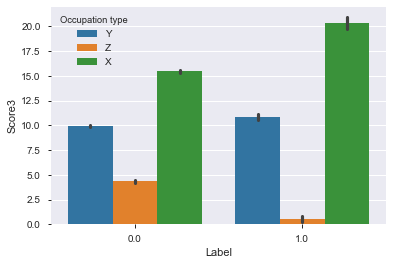

In [118]:
sns.barplot(x="Label",y="Score3",hue="Occupation type",data=df);

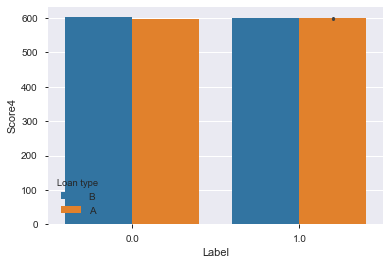

In [119]:
sns.barplot(x="Label",y="Score4",hue="Loan type",data=df);

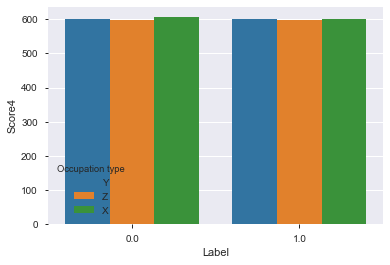

In [120]:
sns.barplot(x="Label",y="Score4",hue="Occupation type",data=df);

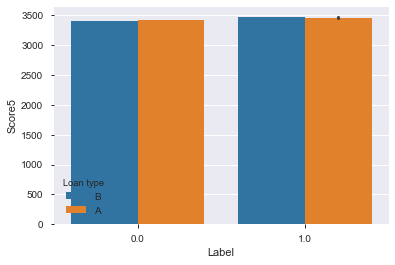

In [121]:
sns.barplot(x="Label",y="Score5",hue="Loan type",data=df);

ID                 0
Expense            0
Income             0
Loan type          0
Occupation type    0
Age                0
Score1             0
Score2             0
Score3             0
Score4             0
Score5             0
Label              0
dtype: int64

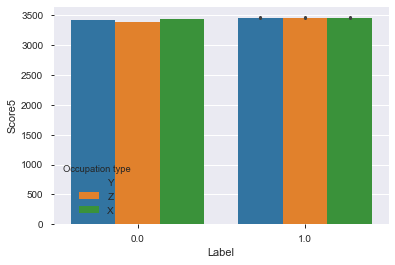

In [124]:
sns.barplot(x="Label",y="Score5",hue="Occupation type",data=df);

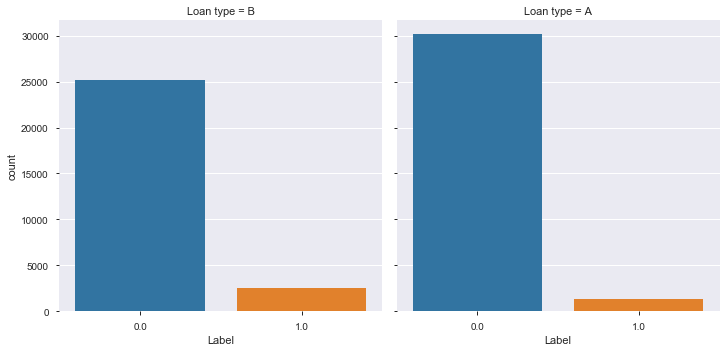

In [126]:
sns.catplot("Label", col="Loan type",data=df,kind="count");

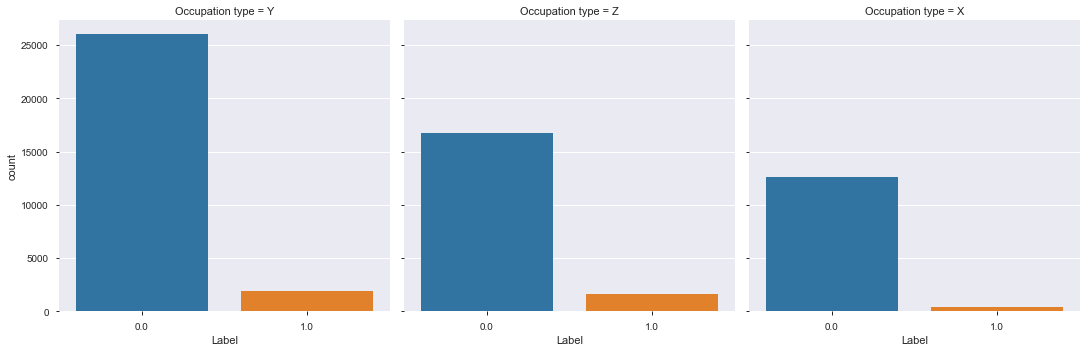

In [127]:
sns.catplot("Label", col="Occupation type",data=df,kind="count");

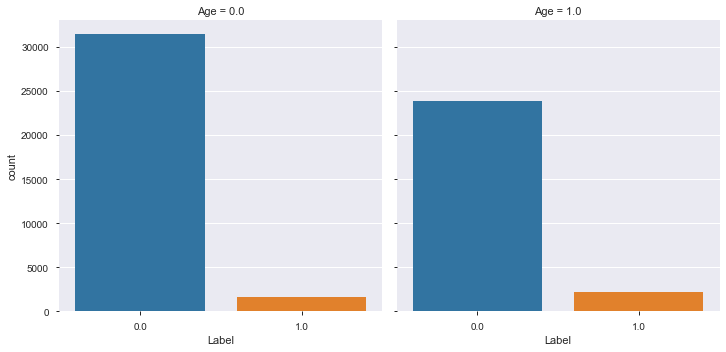

In [128]:
sns.catplot("Label", col="Age",data=df[df["Occupation type"].notnull()],kind="count");

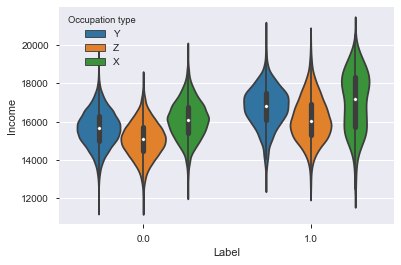

In [129]:
sns.violinplot(x="Label",y="Income",hue="Occupation type",data=df);

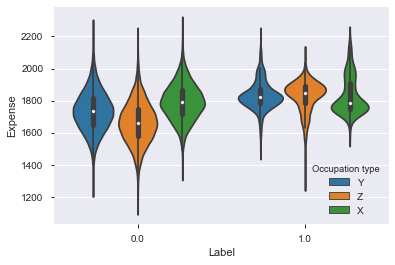

In [130]:
sns.violinplot(x="Label",y="Expense",hue="Occupation type",data=df);

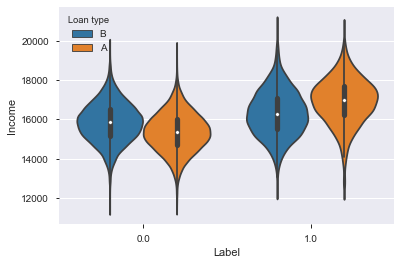

In [131]:
sns.violinplot(x="Label",y="Income",hue="Loan type",data=df);

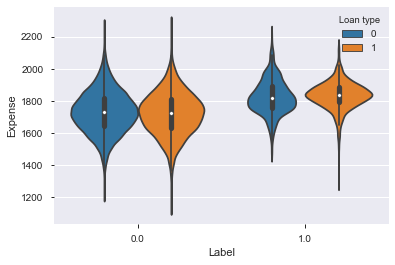

In [58]:
sns.violinplot(x="Label",y="Expense",hue="Loan type",data=df);

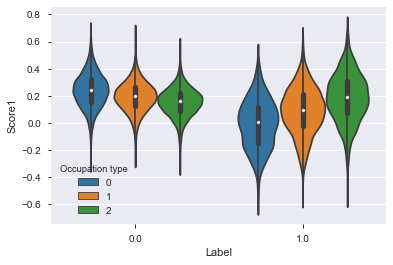

In [82]:
sns.violinplot(x="Label",y="Score1",hue="Occupation type",data=df);

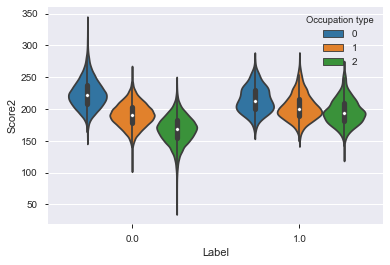

In [78]:
sns.violinplot(x="Label",y="Score2",hue="Occupation type",data=df);

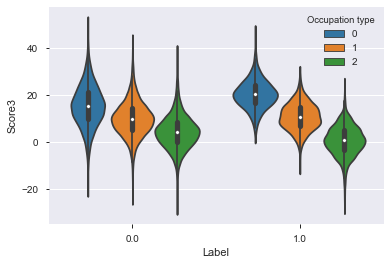

In [77]:
sns.violinplot(x="Label",y="Score3",hue="Occupation type",data=df);

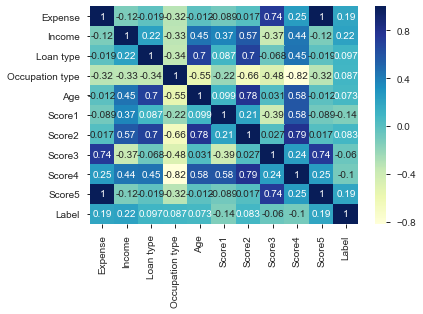

In [146]:
sns.heatmap(df.corr(), cmap="YlGnBu",annot = True);
            

In [134]:
le=LabelEncoder()
df["Loan type"]=le.fit_transform(df["Loan type"]);
df["Occupation type"]=le.fit_transform(df["Occupation type"]);
df.head(10)

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5,Label
0,1,1830.943788,14767.28013,1,1,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291,0.0
1,2,1645.302546,15272.26775,1,1,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455,0.0
2,3,1555.026392,17482.49734,0,1,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886,0.0
5,6,1523.124500,16622.93724,1,1,1.0,0.369899,204.834959,-3.645561,602.787598,3315.891612,0.0
6,7,1560.817726,15917.47219,0,2,0.0,0.104027,169.320992,-3.235722,594.224070,3334.102946,0.0
7,8,1713.508753,13528.79379,0,2,0.0,0.297326,149.138845,5.000398,597.663724,3407.875016,0.0
10,11,1893.876333,15961.48736,1,2,1.0,0.173393,200.266608,7.026415,599.431102,3495.018903,1.0
11,12,1657.701614,15312.65398,1,1,1.0,0.136250,212.479594,6.174057,600.374454,3380.912016,0.0
12,13,1981.609217,14365.93282,0,0,0.0,-0.080880,187.157731,32.634985,599.445461,3537.406700,0.0
14,15,1436.546259,16523.48807,0,1,0.0,0.266537,189.491426,-3.945540,599.717859,3274.061676,0.0


In [139]:
df.drop(["ID"],axis=1,inplace=True)
df.head()

,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5,Label
0,1830.943788,14767.28013,1,1,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291,0.0
1,1645.302546,15272.26775,1,1,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455,0.0
2,1555.026392,17482.49734,0,1,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886,0.0
5,1523.124500,16622.93724,1,1,1.0,0.369899,204.834959,-3.645561,602.787598,3315.891612,0.0
6,1560.817726,15917.47219,0,2,0.0,0.104027,169.320992,-3.235722,594.224070,3334.102946,0.0


In [152]:
x_train,x_test,y_train,y_test= train_test_split(df.drop(["Label"],axis=1),df["Label"])
x_train.shape


(44428, 10)

In [194]:
model = RandomForestClassifier()
#model=XGBClassifier()

In [195]:
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


In [196]:
print("Training accuracy: ", model.score(x_train, y_train))
print("Testing accuracy: ", model.score(x_test, y_test))

Training accuracy:  0.9640316917259386
Testing accuracy:  0.9644159351789332


In [191]:
model.feature_importances_


array([0.10218254, 0.13054967, 0.08074804, 0.04304887, 0.13750653,
       0.09684478, 0.05565018, 0.24254866, 0.11092069, 0.        ],
      dtype=float32)

In [192]:
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)


[[13787    44]
 [  288   691]]


In [193]:
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
auc = auc(fpr, tpr)
auc

0.8513205040652339

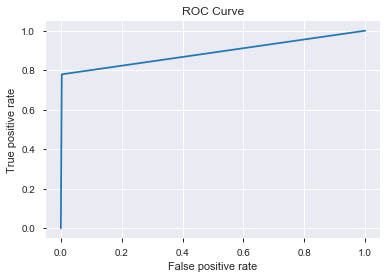

In [177]:
plt.plot(fpr,tpr);
plt.title("ROC Curve")
plt.xlabel("False positive rate");
plt.ylabel("True positive rate");

In [185]:
precision_recall_fscore_support(y_test,y_pred_test)

(array([0.98457694, 0.94782609]),
 array([0.99696334, 0.7793667 ]),
 array([0.99073143, 0.85538117]),
 array([13831,   979], dtype=int64))

In [197]:
test_x=pd.read_csv("c:/Users/Tejas/Downloads/test_x.csv")

In [200]:
test_x.drop(["ID_Test"],axis=1,inplace=True)
test_x.head()

,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1780.356350,16691.51975,B,X,1,0.348808,226.896383,12.506668,607.396052,3440.172169
1,1939.547945,14782.20015,A,Z,0,0.426270,125.046903,12.976712,599.808710,3517.084962
2,1721.876977,14035.40923,B,Z,0,0.097577,181.636946,5.501962,596.344664,3411.918090
3,1681.268538,15179.79116,A,Z,0,0.295460,151.320572,3.058352,597.761361,3392.298282
4,1654.495928,15187.09603,A,Y,0,0.272479,178.429450,4.571414,600.006307,3379.363201


In [206]:
test_x.isna().sum()

Expense            0
Income             0
Loan type          0
Occupation type    0
Age                0
Score1             0
Score2             0
Score3             0
Score4             0
Score5             0
dtype: int64

In [202]:
test_x["Loan type"]=le.fit_transform(test_x["Loan type"]);
test_x["Occupation type"]=le.fit_transform(test_x["Occupation type"]);
test_x.head(10)

,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1780.356350,16691.51975,1,0,1,0.348808,226.896383,12.506668,607.396052,3440.172169
1,1939.547945,14782.20015,0,2,0,0.426270,125.046903,12.976712,599.808710,3517.084962
2,1721.876977,14035.40923,1,2,0,0.097577,181.636946,5.501962,596.344664,3411.918090
3,1681.268538,15179.79116,0,2,0,0.295460,151.320572,3.058352,597.761361,3392.298282
4,1654.495928,15187.09603,0,1,0,0.272479,178.429450,4.571414,600.006307,3379.363201
5,1584.645336,17882.87956,1,1,1,0.104315,226.572790,2.952106,600.836322,3345.615162
6,1734.627096,16400.47806,1,1,1,0.122713,227.104002,10.153987,602.236699,3418.078260
7,1656.988774,15292.17547,1,1,1,0.180994,220.950688,10.142544,603.075492,3380.567610
8,1321.138193,17162.06360,1,2,1,-0.029624,222.117496,-10.055776,595.193750,3218.302722
9,1740.008891,15245.58551,0,2,0,0.100160,160.099115,12.441637,596.755785,3420.678453


In [207]:
test_y = model.predict(test_x)
test_y

array([0., 0., 0., ..., 1., 0., 0.])